In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset("titanic")
survived_titanic = titanic.loc[titanic["survived"] == 1]

### Male vs Female survivors

In [5]:
# separated the dataset into male and female
female_titanic = titanic.loc[titanic["sex"] == "female"]
male_titanic = titanic.loc[titanic["sex"] == "male"]

In [6]:
# female_titanic
len(female_titanic)


314

In [7]:
# dataframe of females that survived
female_survived = female_titanic.loc[female_titanic["survived"] == 1]
len(female_survived)
# survived_female

233

In [8]:
# male_titanic
len(male_titanic)


577

In [9]:
# dataframe of males that survived
male_survived = male_titanic.loc[male_titanic["survived"] == 1]
len(male_survived)
# survived_male

109

In [10]:
# ew, math
female_survived_ratio = len(female_survived) / len(female_titanic) # 233 / 314 = 0.7420
male_survived_ratio = len(male_survived) / len(male_titanic) # 109 / 577 = 0.1889

In [11]:
# swap two rows so the survivor appears first, reordering my histogram columns to yes, then no
# there has 
male_titanic.head(10)
temp = male_titanic.iloc[8].copy()
male_titanic.iloc[8] = male_titanic.iloc[0]
male_titanic.loc[0] = temp
male_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


### Male vs Female Visualization

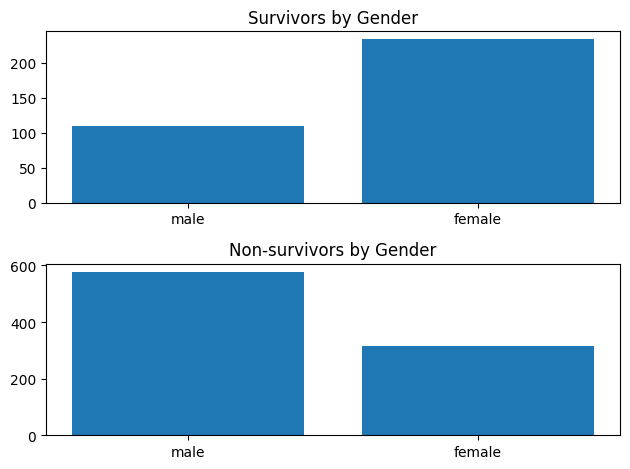

In [12]:
sex = ["male", "female"]
total_sex = [577, 314]
total_survived = [109, 233]

fig, axs = plt.subplots(2, 1)
axs[0].bar(sex, total_survived)
axs[0].set_title("Survivors by Gender")
axs[1].bar(sex, total_sex)
axs[1].set_title("Non-survivors by Gender")

# fixes spacing issue between the title and the column names
plt.tight_layout()
plt.show()

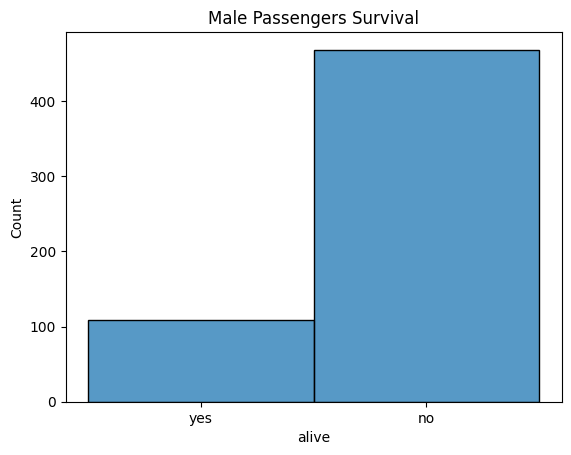

In [13]:
sns.histplot(
    data = male_titanic,
    x = "alive"
)
plt.title("Male Passengers Survival")
plt.show()

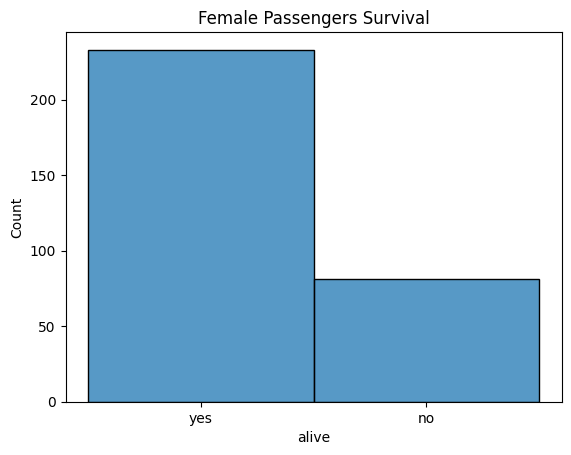

In [14]:
sns.histplot(
    data = female_titanic,
    x = "alive"
)
plt.title("Female Passengers Survival")
plt.show()

### Survivors based on age

In [15]:
# Have to set the order or the male's columns will be revere order than the female
# alive_order = ["yes", "no"]
# female_titanic["alive"] = pd.Categorical(female_titanic["alive"], categories=alive_order, ordered=True)
# male_titanic["alive"] = pd.Categorical(male_titanic["alive"], categories=alive_order, ordered=True)

#### Total Age

In [16]:
# switch spots so histogram column order will be yes, then no
titanic.head(10)
temp = titanic.iloc[1].copy()
titanic.iloc[1] = titanic.iloc[0]
titanic.loc[0] = temp
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


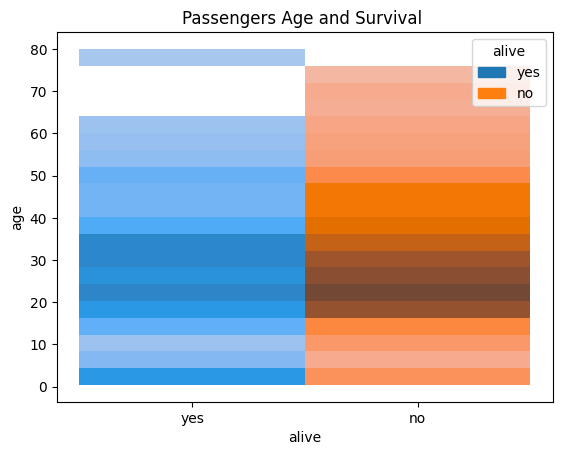

In [17]:
sns.histplot(
    data = titanic,
    x = "alive",
    y = "age",
    hue = "alive",
    # hue_order = alive_order
)
plt.title("Passengers Age and Survival ")
plt.show()

In [18]:
# median age
male_average_age = male_titanic["age"]
print(male_average_age.median())

female_average_age = female_titanic["age"]
print(female_average_age.median())

29.0
27.0


#### Female age

<Axes: xlabel='alive', ylabel='age'>

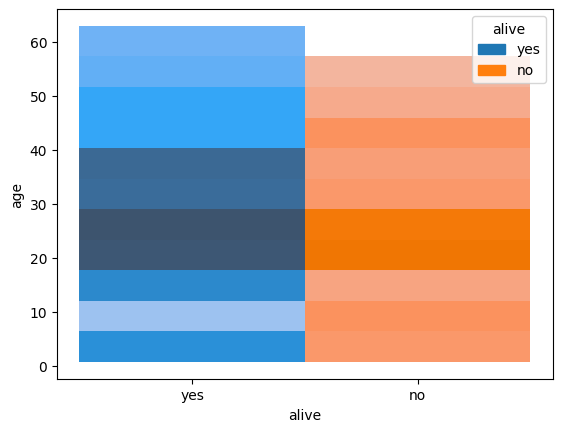

In [19]:
sns.histplot(
    data = female_titanic,
    x = "alive",
    y = "age",
    hue = "alive",
    # hue_order = alive_order
)

In [20]:
male_titanic["alive"].isna().sum()

np.int64(0)

#### Male age

In [21]:
# # swap two rows so the survivor appears first, reordering my histogram columns to yes, then no
# # there has 
# male_titanic.head(10)
# temp = male_titanic.iloc[8].copy()
# male_titanic.iloc[8] = male_titanic.iloc[0]
# male_titanic.loc[0] = temp

<Axes: xlabel='alive', ylabel='age'>

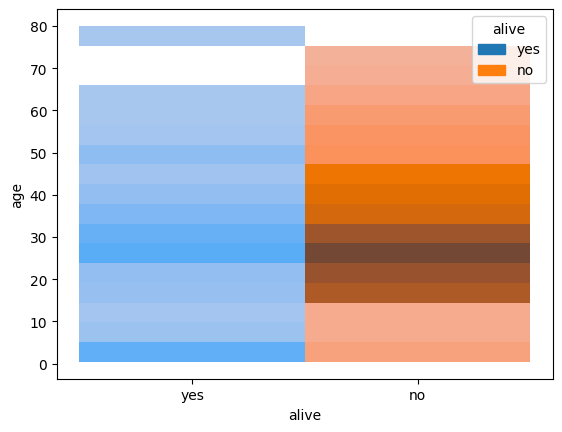

In [22]:
# rearrange the the columns to match the female histogram
#sns.countplot(data = male_titanic, x = "alive", order = order)

sns.histplot(
    data = male_titanic,
    x = "alive",
    y = "age",
    hue = "alive",
    # hue_order = alive_order
)

### Children

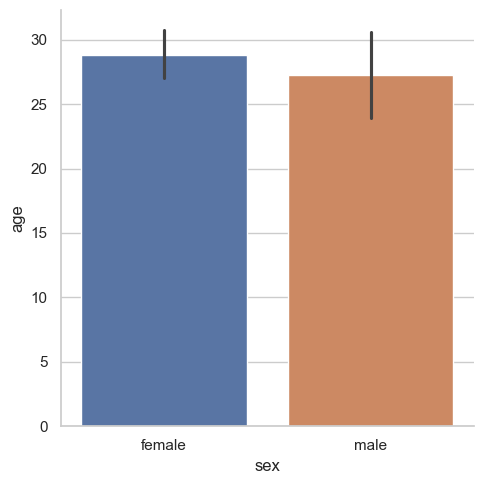

In [23]:
sns.set_theme(style = "whitegrid")
g = sns.catplot(
    data = survived_titanic,
    kind = "bar",
    x = "sex", y = "age", hue = "sex"
)

#### Survivors by wealth/ticket

In [24]:
# titanic.head()
# gets individual dataframes from the ticket class
first_class  = titanic[titanic["class"] == "First"]
second_class = titanic[titanic["class"] == "Second"]
third_class  = titanic[titanic["class"] == "Third"]

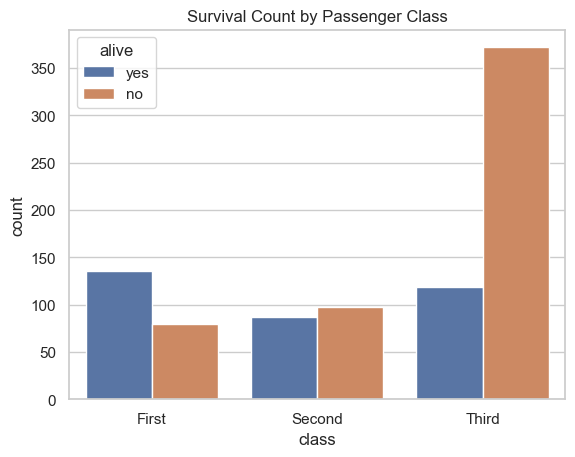

In [25]:
# sns.countplot(data=titanic, x="class")
# plt.title("Passenger Count by Class")

sns.countplot(
    data=titanic,
    x="class",
    hue="alive",
    # test later to see if you can do this for the prior graphics without switching the rows
    hue_order=["yes", "no"]
)

plt.title("Survival Count by Passenger Class")
plt.show()

C:\Users\stanl\AppData\Local\Temp\ipykernel_2284\801542831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = titanic.groupby("class")["survived"].mean()


Text(0, 0.5, 'Survival Rate')

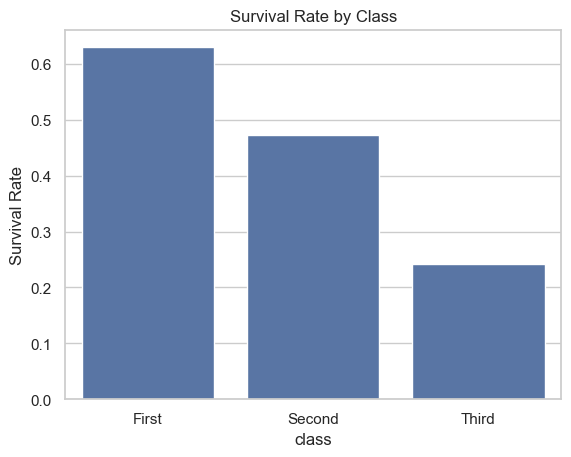

In [26]:
# survival rate percentage
survival_rate = titanic.groupby("class")["survived"].mean()

sns.barplot(
    x=survival_rate.index,
    y=survival_rate.values
)
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")